In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
submit_df = pd.read_csv('sample_submission.csv')

In [5]:
df.head()

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123064 entries, 0 to 3123063
Data columns (total 3 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   user_id             int64 
 1   order_completed_at  object
 2   cart                int64 
dtypes: int64(2), object(1)
memory usage: 71.5+ MB


In [7]:
submit_df.head()

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0


In [8]:
submit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790449 entries, 0 to 790448
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      790449 non-null  object
 1   target  790449 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.1+ MB


In [9]:
df.isnull().sum()  # There is no missing values in the data frame

user_id               0
order_completed_at    0
cart                  0
dtype: int64

# Exploratory Data Analysis

In [10]:
df_user_orders = df.groupby(['user_id','order_completed_at'])['cart'].count().reset_index()

In [11]:
df_user_orders['order_completed_at'] = pd.to_datetime(df_user_orders['order_completed_at'])

In [12]:
df_user_orders['Year'] = df_user_orders['order_completed_at'].dt.year
df_user_orders['Month'] = df_user_orders['order_completed_at'].dt.month
df_user_orders['Day_of_Week'] = df_user_orders['order_completed_at'].dt.day_name()
df_user_orders['Hour_of_Day'] = df_user_orders['order_completed_at'].dt.hour

In [13]:
df_user_orders

,user_id,order_completed_at,cart,Year,Month,Day_of_Week,Hour_of_Day
0,0,2020-07-19 09:59:17,8,2020,7,Sunday,9
1,0,2020-08-24 08:55:32,25,2020,8,Monday,8
2,0,2020-09-02 07:38:25,11,2020,9,Wednesday,7
3,1,2019-05-08 16:09:41,1,2019,5,Wednesday,16
4,1,2020-01-17 14:44:23,6,2020,1,Friday,14
...,...,...,...,...,...,...,...
209401,19998,2020-09-01 08:12:32,7,2020,9,Tuesday,8
209402,19998,2020-09-02 15:03:23,4,2020,9,Wednesday,15
209403,19999,2020-08-31 18:54:24,1,2020,8,Monday,18
209404,19999,2020-08-31 19:32:08,1,2020,8,Monday,19


### Distribution of total number of orders by year

In [14]:
orders_by_year = df_user_orders.groupby('Year').count()['user_id']

In [15]:
orders_by_year

Year
2015        10
2016       103
2017       624
2018      1685
2019     34500
2020    172484
Name: user_id, dtype: int64

The number of orders made has increased significantly since 2015. 

### Distribution of orders by month

In [16]:
orders_by_month = df_user_orders.groupby('Month').count()['user_id']

In [17]:
orders_by_month

Month
1      9357
2      9750
3     12966
4     17770
5     24135
6     32185
7     35199
8     35642
9      6817
10     6598
11     9533
12     9454
Name: user_id, dtype: int64

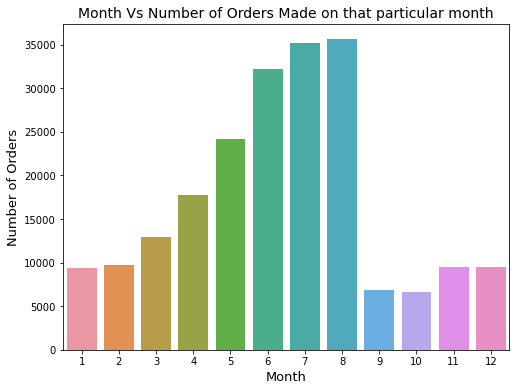

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=orders_by_month.index,y=orders_by_month)
plt.title('Month Vs Number of Orders Made on that particular month', fontsize=14)
plt.ylabel('Number of Orders',fontsize=13)
plt.xlabel('Month',fontsize=13);

From the graph above we can colclude that the maximum amount of orders has been made during late spring and summer. There is a significant drop in the amount of orders during autumn and winter. The spring is characterized by the largest growth in orders made.

### Distribution of orders by day of the week

In [19]:
orders_by_day_of_week = df_user_orders.groupby('Day_of_Week').count()['user_id'].sort_values()

In [20]:
orders_by_day_of_week

Day_of_Week
Friday       26255
Sunday       26961
Saturday     27680
Monday       30506
Thursday     30967
Tuesday      32631
Wednesday    34406
Name: user_id, dtype: int64

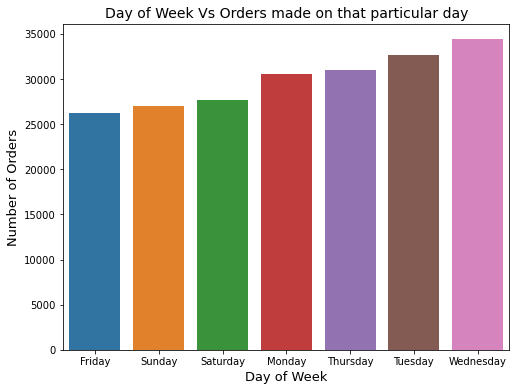

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x=orders_by_day_of_week.index,y=orders_by_day_of_week)
plt.title('Day of Week Vs Orders made on that particular day', fontsize=14)
plt.ylabel('Number of Orders',fontsize=13)
plt.xlabel('Day of Week',fontsize=13);

From the graph above we can see that there is no significant difference in the number of orders made by day of week. But in general, larger amount of orders has been made on Monday to Tuesday with maximum amount on Wednesday. From Friday to Sunday people tend to make fewer orders.

### Distribution of orders made by hour 

In [22]:
orders_by_hour = df_user_orders.groupby('Hour_of_Day').count()['user_id']

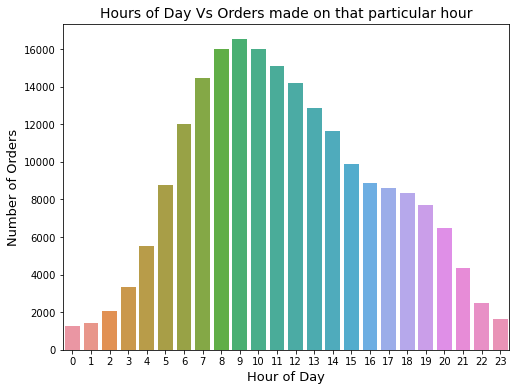

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=orders_by_hour.index,y=orders_by_hour)
plt.title('Hours of Day Vs Orders made on that particular hour', fontsize=14)
plt.ylabel('Number of Orders',fontsize=13)
plt.xlabel('Hour of Day',fontsize=13);

The graph above depicts that maximum number of orders has been made in the morning (8-10 AM). In the late evening and night, when the majority of people sleep (22 PM - 4 AM), the number of items purchased was the lowest. 

### Distribution of orders made by day of week and hour of day

In [24]:
grouped_orders = df_user_orders.groupby(['Day_of_Week','Hour_of_Day'])['user_id'].aggregate('count').reset_index()

In [25]:
#This table shows number of orders on the particular day of the week at a particular hour.
grouped_orders = grouped_orders.pivot(index = 'Hour_of_Day',columns = 'Day_of_Week', values= 'user_id')

In [26]:
grouped_orders

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour_of_Day,,,,,,,
0,156,139,172,172,193,209,227
1,165,196,183,196,203,234,236
2,233,288,277,273,263,366,345
3,402,487,431,482,470,554,498
4,696,763,745,777,771,890,866
5,1080,1277,1210,1181,1227,1403,1413
6,1392,1712,1625,1588,1839,1868,1996
7,1789,2007,1863,1809,2311,2198,2485
8,2006,2150,1969,1986,2735,2343,2795


<AxesSubplot:xlabel='Day_of_Week', ylabel='Hour_of_Day'>

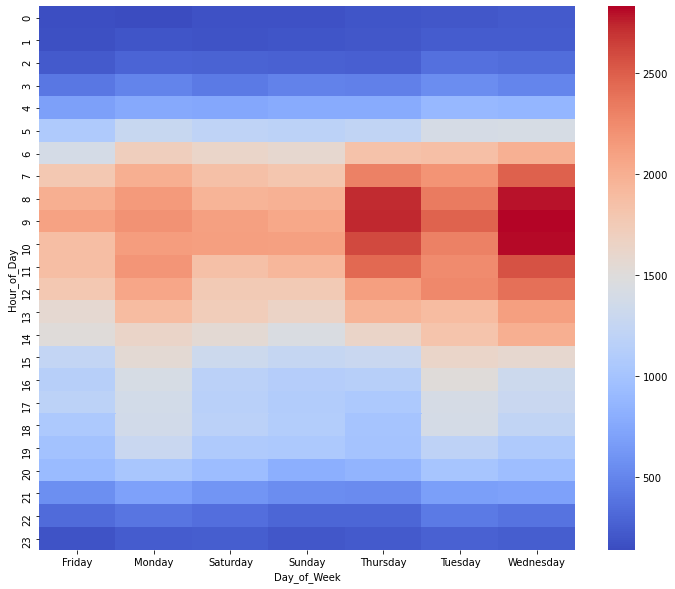

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(grouped_orders, cmap='coolwarm')

The heatmap above shows that the maximum amount of orders have been made on Wednesday at 8-10 AM and on Thursday at 8-9 AM. 

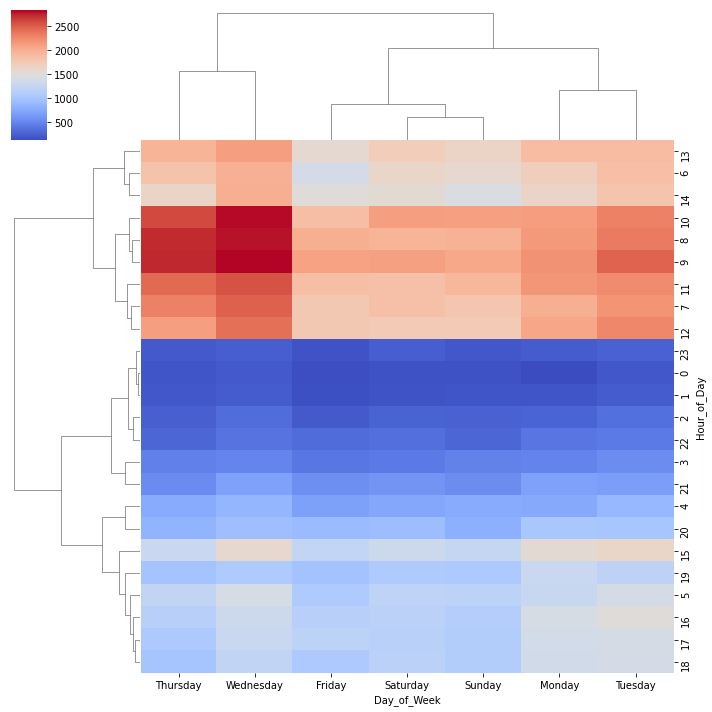

In [28]:
sns.clustermap(grouped_orders, cmap='coolwarm')

<AxesSubplot:xlabel='Day_of_Week', ylabel='Day_of_Week'>

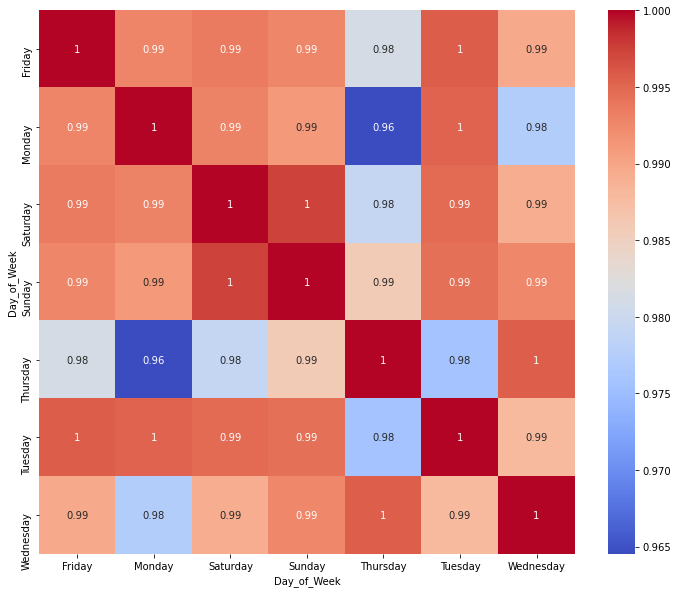

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(grouped_orders.corr(), cmap='coolwarm', annot=True)

### Distribution of the number of orders made by every user

In [30]:
number_of_orders_per_user = df_user_orders['user_id'].value_counts()

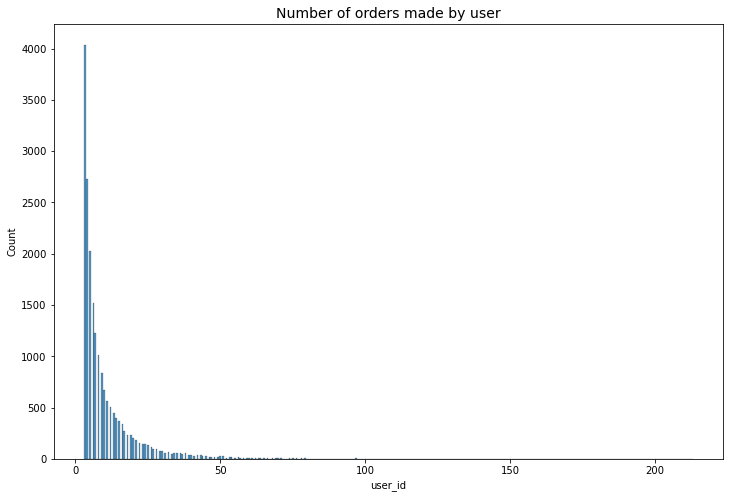

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(number_of_orders_per_user)
plt.title('Number of orders made by user', fontsize=14);

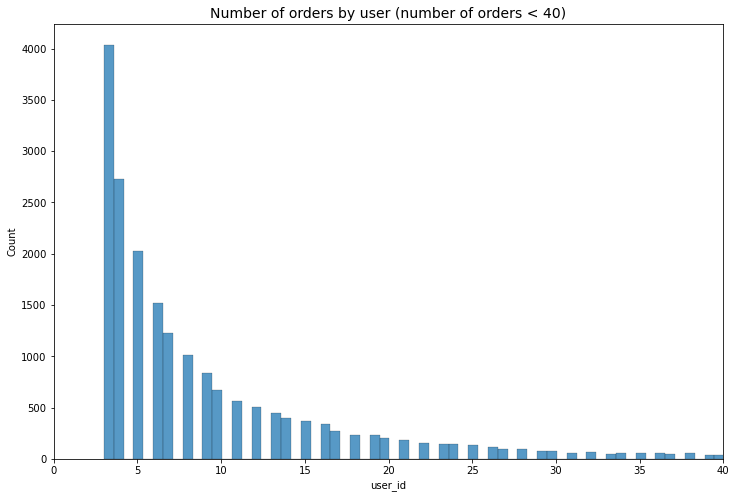

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(number_of_orders_per_user)
plt.title('Number of orders by user (number of orders < 40)', fontsize=14)
plt.xlim(0,40);

The histograms show that number of orders per user are between 3-213. But few users made more than 10 orders. Users that are making only 3 orders is the largest group.

### The distribution of products purchased per order 

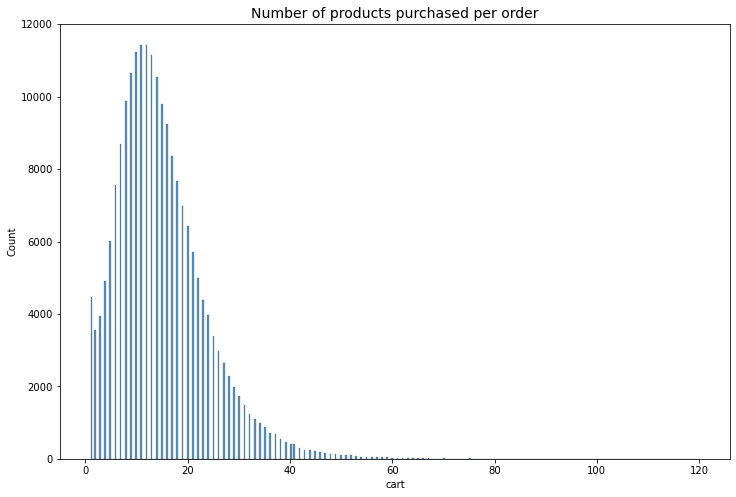

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df_user_orders['cart'])
plt.title('Number of products purchased per order', fontsize=14);

The histogram above depicts that number of items per order are between 1-120. Very few orders include more than 40 items per order. Most often an order consists of 10-13 items. 

### Products that users bought the most

In [34]:
sales_per_cat = df['cart'].value_counts()

Text(0, 0.5, 'Number of sold products')

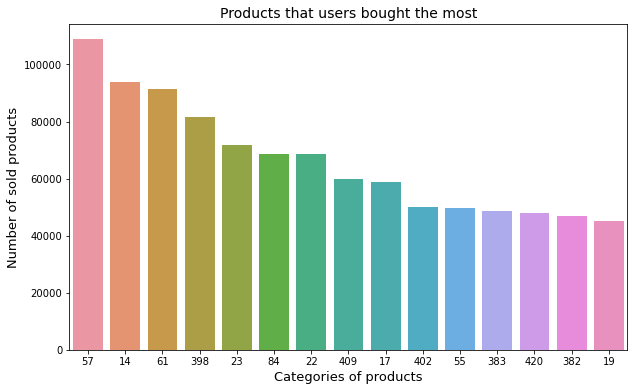

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_per_cat.head(15).index, y=sales_per_cat.head(15), 
            order=sales_per_cat.head(15).index)
plt.title('Products that users bought the most', fontsize=14)
plt.xlabel('Categories of products',fontsize=13)
plt.ylabel('Number of sold products',fontsize=13)

The most popular product categories are 57,14 and 61.

### Reordering of products

In [36]:
df_times_ordered = df.groupby(['user_id','cart']).count().reset_index()

In [37]:
df_times_ordered['was_reordered'] = df_times_ordered['order_completed_at'].apply(lambda x: 0 if x == 1 else 1)

In [38]:
df_times_ordered.columns = ['user_id','cart','times_ordered','was_reordered']

In [39]:
df_times_ordered['was_reordered'].sum()/len(df_times_ordered) 

0.4983911954187545

In [40]:
avg_reordered = df_times_ordered.groupby("cart")["was_reordered"].aggregate("mean")

In [41]:
avg_reordered = avg_reordered.sort_values(ascending=False).head(15)

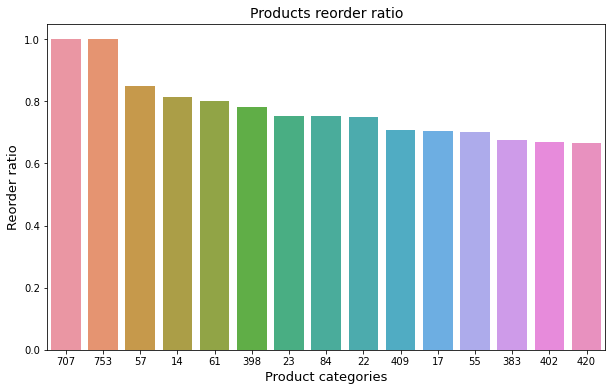

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_reordered.index, y=avg_reordered,
            order=avg_reordered.index)
plt.title('Products reorder ratio', fontsize=14)
plt.xlabel('Product categories',fontsize=13)
plt.ylabel('Reorder ratio',fontsize=13);

Product categories 707 and 753 are the most reordered. 57,14 and 61 categories took from 3rd to 5th place while being TOP 3 in the rating of best selling products.

### The number of days since prior order

In [43]:
df_days_since_prior_order = df_user_orders[['user_id','order_completed_at']]
days_since_last_order = df_days_since_prior_order.groupby('user_id')['order_completed_at'].diff().dt.days
df_days_since_prior_order['days_since_last_order'] = days_since_last_order.fillna(-1).astype('int')
# -1 in the column 'days_since_last_order' stands for 'first order' for given 'user_id'

<ipython-input-43-5f18a396e407>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days_since_prior_order['days_since_last_order'] = days_since_last_order.fillna(-1).astype('int')


In [44]:
days_since_last_order_freq = df_days_since_prior_order['days_since_last_order'].value_counts()[1:]

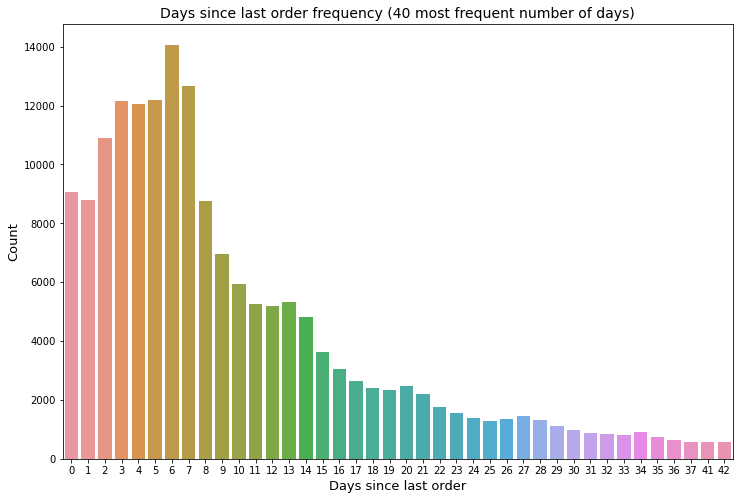

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(x=days_since_last_order_freq[0:40].index,y=days_since_last_order_freq[0:40].values)
plt.title('Days since last order frequency (40 most frequent number of days)', fontsize=14)
plt.xlabel('Days since last order',fontsize=13)
plt.ylabel('Count',fontsize=13);

The largest part of repeated orders was made within a week. 

# Feature engineering

Since we choose the last order of each customer as out target(label) for the purpose of model training, we need to 
exclude the data on the last order from the feature set, otherwise the information on the correct answer (whether 
the item will be reordered or not) will be embedded in our training data and result in data leakage. 

In [46]:
# Find the last order date for each customer
gb = df.groupby(['user_id','order_completed_at']).count().drop('cart',axis=1).reset_index().groupby('user_id')
last_order_date_global = gb.agg({'order_completed_at': np.max})

In [47]:
last_order_date_global = last_order_date_global.reset_index()
last_order_date_global

,user_id,order_completed_at
0,0,2020-09-02 07:38:25
1,1,2020-07-14 10:20:58
2,2,2020-06-18 18:31:08
3,3,2020-06-24 13:07:29
4,4,2020-08-27 13:54:48
...,...,...
19995,19995,2020-08-30 14:57:36
19996,19996,2020-09-02 07:45:27
19997,19997,2020-08-31 11:48:23
19998,19998,2020-09-02 15:03:23


In [48]:
# find elements in df that are not in last_order_date_global
keys = list(last_order_date_global.columns.values)
i1 = df.set_index(keys).index
i2 = last_order_date_global.set_index(keys).index
data_without_last_order = df[~i1.isin(i2)]
data_without_last_order

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157
...,...,...,...
3122320,10497,2020-09-03 20:03:55,393
3122321,10497,2020-09-03 20:03:55,409
3122322,10497,2020-09-03 20:03:55,17
3122323,10497,2020-09-03 20:03:55,57


## Create predictors attributed to user (characterizing user behavior)

### Total number of orders per customer

This feature defines the overall inclination of the customer towards ordering products on the platform. We calculate it as the total number of orders per customer. 

In [49]:
num_orders_per_user_wo_last = data_without_last_order.groupby(['user_id','order_completed_at'])['cart'].count()

num_orders_per_user_wo_last = num_orders_per_user_wo_last.groupby('user_id').count().reset_index()

num_orders_per_user_wo_last.columns = ['user_id','total_orders_per_user']

In [50]:
num_orders_per_user_wo_last

,user_id,total_orders_per_user
0,0,2
1,1,8
2,2,14
3,3,6
4,4,7
...,...,...
19995,19995,2
19996,19996,2
19997,19997,2
19998,19998,2


### Customer reordering frequency 

This feature characterizes the customer's tendency to reorder.
We calculate this feature as a ratio of the total times of reorders per user and the total number of purchased products by this user.

In [51]:
df_times_ordered = data_without_last_order.groupby(['user_id','cart']).count().reset_index()

In [52]:
# Add the column that shows whether the particular product was reordered or not by a particular user
df_times_ordered['was_reordered'] = df_times_ordered['order_completed_at'].apply(lambda x: 0 if x == 1 else 1)

In [53]:
df_times_ordered.columns = ['user_id','cart','times_ordered','was_reordered']

In [54]:
df_times_ordered.head()

,user_id,cart,times_ordered,was_reordered
0,0,5,1,0
1,0,10,1,0
2,0,14,2,1
3,0,20,1,0
4,0,22,1,0


In [55]:
# Add the column that shows how many times the particular product was reordered by a particular user
df_times_ordered['times_reordered'] = df_times_ordered['times_ordered'] - 1

In [56]:
df_times_ordered.head()

,user_id,cart,times_ordered,was_reordered,times_reordered
0,0,5,1,0,0
1,0,10,1,0,0
2,0,14,2,1,1
3,0,20,1,0,0
4,0,22,1,0,0


In [57]:
nominator = df_times_ordered.groupby('user_id')['times_reordered'].sum() 

In [58]:
denominator = df_times_ordered.groupby('user_id')['times_ordered'].sum()

In [59]:
user_reorder = nominator / denominator

In [60]:
user_reorder.head()

user_id
0    0.181818
1    0.464286
2    0.551515
3    0.297872
4    0.534653
dtype: float64

In [61]:
user_reorder = user_reorder.reset_index()

In [63]:
user_reorder.columns = ['user_id','user_reorder_ratio']
user_reorder.head()

,user_id,user_reorder_ratio
0,0,0.181818
1,1,0.464286
2,2,0.551515
3,3,0.297872
4,4,0.534653


In [64]:
user_features = pd.merge(num_orders_per_user_wo_last,user_reorder,how='inner',on='user_id')

In [65]:
user_features

,user_id,total_orders_per_user,user_reorder_ratio
0,0,2,0.181818
1,1,8,0.464286
2,2,14,0.551515
3,3,6,0.297872
4,4,7,0.534653
...,...,...,...
19995,19995,2,0.000000
19996,19996,2,0.000000
19997,19997,2,0.000000
19998,19998,2,0.333333


## Create predictors attributed to products (defining the characteristics of products)

### Number of purchases of each product

The feature represents the total number of purchases of each product by all customers.

In [72]:
product = data_without_last_order['cart'].value_counts().to_frame('prod_total_purchases')

In [73]:
product = product.reset_index()

In [74]:
product.columns = ['cart', 'prod_total_purchases']
product

,cart,prod_total_purchases
0,57,98788
1,14,85164
2,61,83360
3,398,74505
4,23,65404
...,...,...
864,703,1
865,543,1
866,701,1
867,545,1


### Product's reorder probability

This feature is the probability of the product of being reordered. It is calculated as a total number of reorders of this product divided by the total number of purchases of this product made by all users. 

In [84]:
denominator = df_times_ordered.groupby('cart')['times_ordered'].sum()

In [85]:
nominator = df_times_ordered.groupby('cart')['times_reordered'].sum()

In [86]:
product_reorder = nominator / denominator

In [87]:
product_reorder.head()

cart
0    0.555050
1    0.393491
2    0.178571
3    0.000000
4    0.135266
dtype: float64

In [88]:
product_reorder = product_reorder.reset_index()

In [89]:
product_reorder.columns = ['cart','prod_reorder_ratio']
product_reorder

,cart,prod_reorder_ratio
0,0,0.555050
1,1,0.393491
2,2,0.178571
3,3,0.000000
4,4,0.135266
...,...,...
864,876,0.000000
865,877,0.333333
866,878,0.000000
867,879,0.000000


In [90]:
product_features = pd.merge(product,product_reorder,how='left',on='cart')
product_features

,cart,prod_total_purchases,prod_reorder_ratio
0,57,98788,0.834636
1,14,85164,0.820664
2,61,83360,0.817658
3,398,74505,0.805490
4,23,65404,0.783744
...,...,...,...
864,703,1,0.000000
865,543,1,0.000000
866,701,1,0.000000
867,545,1,0.000000


# Create user-product predictors

### How many times each particular user bought a particular product

This predictor represents how many times each customer bought a particular product.

In [91]:
df_user_product = df_times_ordered.drop(['was_reordered','times_reordered'],axis=1)

In [94]:
df_user_product.columns = ['user_id','cart','u_and_p_total_purchases']

In [95]:
df_user_product

,user_id,cart,u_and_p_total_purchases
0,0,5,1
1,0,10,1
2,0,14,2
3,0,20,1
4,0,22,1
...,...,...,...
1031264,19998,84,1
1031265,19998,398,2
1031266,19998,415,2
1031267,19998,420,2


### How frequently a customer bought a product after its first purchase

This feature describes the level of retention of the user with regards to each particular product. We calculate the feature as a ratio of times a user bought a product and the number of orders made since first purchase. 
The  ratio describes how many times a user bought a product out of how many times this user had the chance to a buy it (since the first purchase).

In [96]:
# Calculate the total numbers of orders per user
total_orders = df_user_orders['user_id'].value_counts().to_frame().reset_index()
total_orders.columns = ['user_id', 'total_num_orders']
total_orders

,user_id,total_num_orders
0,2196,213
1,75,187
2,5992,165
3,458,163
4,1156,155
...,...,...
19995,9964,3
19996,6038,3
19997,13513,3
19998,14190,3


In [97]:
# Find the date of the first purchase of each product by each user
first_order_date = data_without_last_order.groupby(['user_id','cart']).agg({'order_completed_at': np.min})

In [98]:
first_order_date = first_order_date.reset_index()
first_order_date

,user_id,cart,order_completed_at
0,0,5,2020-08-24 08:55:32
1,0,10,2020-08-24 08:55:32
2,0,14,2020-07-19 09:59:17
3,0,20,2020-07-19 09:59:17
4,0,22,2020-08-24 08:55:32
...,...,...,...
1031264,19998,84,2020-09-01 08:12:32
1031265,19998,398,2020-08-30 12:15:55
1031266,19998,415,2020-08-30 12:15:55
1031267,19998,420,2020-08-30 12:15:55


In [99]:
# Insert a column with the sequential number for each order of each user
user_order_dates = data_without_last_order.groupby(['user_id', 'order_completed_at']).count().drop('cart', axis=1).reset_index()

idxs = []
for r in user_order_dates.groupby('user_id').count()['order_completed_at'].apply(lambda x: range(1, x+1)):
    idxs += list(r)

idxs = np.array(idxs)
user_order_dates['order_num'] = idxs
user_order_dates


,user_id,order_completed_at,order_num
0,0,2020-07-19 09:59:17,1
1,0,2020-08-24 08:55:32,2
2,1,2019-05-08 16:09:41,1
3,1,2020-01-17 14:44:23,2
4,1,2020-02-06 22:46:55,3
...,...,...,...
189401,19997,2020-08-31 11:04:05,2
189402,19998,2020-08-30 12:15:55,1
189403,19998,2020-09-01 08:12:32,2
189404,19999,2020-08-31 18:54:24,1


In [100]:
# By merging three tables above, for each customer and each product we discover 
# how many orders the customer made and and when a customer ordered this product 
# for the first time (in which order out of the total number of orders)

m = pd.merge(first_order_date, user_order_dates, how='inner', on=['user_id', 'order_completed_at'])
m = pd.merge(m, total_orders, how='inner', on='user_id')
m = m.drop('order_completed_at',axis=1)
m.columns = ['user_id','cart','first_order_num', 'total_num_orders']

# We also calculate how many times the customer could potentially buy 
# the product (since the first purchase of the said product):
m['num_orders_potential'] = m.total_num_orders - m.first_order_num + 1
m

,user_id,cart,first_order_num,total_num_orders,num_orders_potential
0,0,5,2,3,2
1,0,10,2,3,2
2,0,22,2,3,2
3,0,25,2,3,2
4,0,26,2,3,2
...,...,...,...,...,...
1031264,19998,415,1,3,3
1031265,19998,420,1,3,3
1031266,19998,61,2,3,2
1031267,19998,84,2,3,2


In [101]:
# We calculate the feature as a ratio of times a user bought a product 
# and the number of orders made since first purchase. 

m = pd.merge(m, df_user_product, how="left", on=["user_id","cart"])
m['u_and_p_reorder_ratio'] = m.u_and_p_total_purchases / m.num_orders_potential
m

,user_id,cart,first_order_num,total_num_orders,num_orders_potential,u_and_p_total_purchases,u_and_p_reorder_ratio
0,0,5,2,3,2,1,0.500000
1,0,10,2,3,2,1,0.500000
2,0,22,2,3,2,1,0.500000
3,0,25,2,3,2,1,0.500000
4,0,26,2,3,2,1,0.500000
...,...,...,...,...,...,...,...
1031264,19998,415,1,3,3,2,0.666667
1031265,19998,420,1,3,3,2,0.666667
1031266,19998,61,2,3,2,1,0.500000
1031267,19998,84,2,3,2,1,0.500000


We decided to keep only the 'user_id', 'cart_id' and the final feature 'u_and_p_reorder_ratio'

In [102]:
u_and_p_ratio = m.drop(['first_order_num', 'total_num_orders', 'num_orders_potential', 'u_and_p_total_purchases'], 
                       axis=1)

In [103]:
u_and_p_ratio.head()

,user_id,cart,u_and_p_reorder_ratio
0,0,5,0.5
1,0,10,0.5
2,0,22,0.5
3,0,25,0.5
4,0,26,0.5


### Merge user-product predictors

In [106]:
u_and_p = pd.merge(df_user_product, u_and_p_ratio, how="inner", on=["user_id","cart"])

In [107]:
u_and_p.head()

,user_id,cart,u_and_p_total_purchases,u_and_p_reorder_ratio
0,0,5,1,0.500000
1,0,10,1,0.500000
2,0,14,2,0.666667
3,0,20,1,0.333333
4,0,22,1,0.500000


### Merge all features

We merge the DataFrames with the three types of predictors that we have created (attributed to users, products and user and products).


In [108]:
X = pd.merge(u_and_p, user_features, how="left", on="user_id")

In [109]:
X

,user_id,cart,u_and_p_total_purchases,u_and_p_reorder_ratio,total_orders_per_user,user_reorder_ratio
0,0,5,1,0.500000,2,0.181818
1,0,10,1,0.500000,2,0.181818
2,0,14,2,0.666667,2,0.181818
3,0,20,1,0.333333,2,0.181818
4,0,22,1,0.500000,2,0.181818
...,...,...,...,...,...,...
1031264,19998,84,1,0.500000,2,0.333333
1031265,19998,398,2,0.666667,2,0.333333
1031266,19998,415,2,0.666667,2,0.333333
1031267,19998,420,2,0.666667,2,0.333333


In [110]:
X = pd.merge(X, product_features, how="left", on="cart")

In [111]:
X

,user_id,cart,u_and_p_total_purchases,u_and_p_reorder_ratio,total_orders_per_user,user_reorder_ratio,prod_total_purchases,prod_reorder_ratio
0,0,5,1,0.500000,2,0.181818,27790,0.612487
1,0,10,1,0.500000,2,0.181818,13307,0.636357
2,0,14,2,0.666667,2,0.181818,85164,0.820664
3,0,20,1,0.333333,2,0.181818,13664,0.567769
4,0,22,1,0.500000,2,0.181818,62240,0.779708
...,...,...,...,...,...,...,...,...
1031264,19998,84,1,0.500000,2,0.333333,62399,0.782673
1031265,19998,398,2,0.666667,2,0.333333,74505,0.805490
1031266,19998,415,2,0.666667,2,0.333333,2042,0.451518
1031267,19998,420,2,0.666667,2,0.333333,43748,0.711644


# Find target column for model training

In [116]:
# Find the date of the last purchase of each product by each user
last_order_date = df.groupby(['user_id','cart']).agg({'order_completed_at': np.max})

In [117]:
last_order_date = last_order_date.reset_index()

In [118]:
last_order_date.head()

,user_id,cart,order_completed_at
0,0,5,2020-08-24 08:55:32
1,0,10,2020-08-24 08:55:32
2,0,14,2020-08-24 08:55:32
3,0,20,2020-07-19 09:59:17
4,0,22,2020-08-24 08:55:32


In [119]:
# Insert a column with the sequential number for each order of each user
user_order_dates = df.groupby(['user_id', 'order_completed_at']).count().drop('cart', axis=1).reset_index()

idxs = []
for r in user_order_dates.groupby('user_id').count()['order_completed_at'].apply(lambda x: range(1, x+1)):
    idxs += list(r)

idxs = np.array(idxs)
user_order_dates['order_num'] = idxs
user_order_dates

,user_id,order_completed_at,order_num
0,0,2020-07-19 09:59:17,1
1,0,2020-08-24 08:55:32,2
2,0,2020-09-02 07:38:25,3
3,1,2019-05-08 16:09:41,1
4,1,2020-01-17 14:44:23,2
...,...,...,...
209401,19998,2020-09-01 08:12:32,2
209402,19998,2020-09-02 15:03:23,3
209403,19999,2020-08-31 18:54:24,1
209404,19999,2020-08-31 19:32:08,2


In [120]:
# By merging tables, we discover index of the last order of every 
# product purchased by a particular customer.

merged = pd.merge(last_order_date, user_order_dates, how='left', on=['user_id', 'order_completed_at'])
merged = merged.drop('order_completed_at', axis=1)
merged.columns = ['user_id', 'cart', 'last_cart_order_position']
merged

,user_id,cart,last_cart_order_position
0,0,5,2
1,0,10,2
2,0,14,2
3,0,20,1
4,0,22,2
...,...,...,...
1117595,19998,409,3
1117596,19998,415,2
1117597,19998,420,2
1117598,19998,798,3


In [130]:
# Calculate the total number of orders per user
user_total_orders_num = user_order_dates.groupby('user_id')['order_num'].count()

In [131]:
merged = pd.merge(merged, user_total_orders_num, how='left', on='user_id')
merged

,user_id,cart,last_cart_order_position,order_num
0,0,5,2,3
1,0,10,2,3
2,0,14,2,3
3,0,20,1,3
4,0,22,2,3
...,...,...,...,...
1117595,19998,409,3,3
1117596,19998,415,2,3
1117597,19998,420,2,3
1117598,19998,798,3,3


In [132]:
merged.columns = ['user_id', 'cart', 'last_cart_order_position', 'total_num_user_orders']
merged

,user_id,cart,last_cart_order_position,total_num_user_orders
0,0,5,2,3
1,0,10,2,3
2,0,14,2,3
3,0,20,1,3
4,0,22,2,3
...,...,...,...,...
1117595,19998,409,3,3
1117596,19998,415,2,3
1117597,19998,420,2,3
1117598,19998,798,3,3


In [133]:
# Define Y as 1 if the customer ordered the product in his/her last order, and 0 otherwise.
merged['Y_cart_reordered'] = (merged['total_num_user_orders'] == merged['last_cart_order_position']).astype('int')
merged

,user_id,cart,last_cart_order_position,total_num_user_orders,Y_cart_reordered
0,0,5,2,3,0
1,0,10,2,3,0
2,0,14,2,3,0
3,0,20,1,3,0
4,0,22,2,3,0
...,...,...,...,...,...
1117595,19998,409,3,3,1
1117596,19998,415,2,3,0
1117597,19998,420,2,3,0
1117598,19998,798,3,3,1


In [134]:
y = merged['Y_cart_reordered']
y

0          0
1          0
2          0
3          0
4          0
          ..
1117595    1
1117596    0
1117597    0
1117598    1
1117599    1
Name: Y_cart_reordered, Length: 1117600, dtype: int64

# Features and Label

In [139]:
X_and_Y = pd.merge(X, merged, how='left', on=['user_id', 'cart']).drop(['last_cart_order_position', 
                                                                        'total_num_user_orders'], axis=1)
X_and_Y

,user_id,cart,u_and_p_total_purchases,u_and_p_reorder_ratio,total_orders_per_user,user_reorder_ratio,prod_total_purchases,prod_reorder_ratio,Y_cart_reordered
0,0,5,1,0.500000,2,0.181818,27790,0.612487,0
1,0,10,1,0.500000,2,0.181818,13307,0.636357,0
2,0,14,2,0.666667,2,0.181818,85164,0.820664,0
3,0,20,1,0.333333,2,0.181818,13664,0.567769,0
4,0,22,1,0.500000,2,0.181818,62240,0.779708,0
...,...,...,...,...,...,...,...,...,...
1031264,19998,84,1,0.500000,2,0.333333,62399,0.782673,1
1031265,19998,398,2,0.666667,2,0.333333,74505,0.805490,0
1031266,19998,415,2,0.666667,2,0.333333,2042,0.451518,0
1031267,19998,420,2,0.666667,2,0.333333,43748,0.711644,0


In [140]:
X_and_Y = X_and_Y.drop(['user_id','cart'],axis=1)

In [141]:
X_and_Y

,u_and_p_total_purchases,u_and_p_reorder_ratio,total_orders_per_user,user_reorder_ratio,prod_total_purchases,prod_reorder_ratio,Y_cart_reordered
0,1,0.500000,2,0.181818,27790,0.612487,0
1,1,0.500000,2,0.181818,13307,0.636357,0
2,2,0.666667,2,0.181818,85164,0.820664,0
3,1,0.333333,2,0.181818,13664,0.567769,0
4,1,0.500000,2,0.181818,62240,0.779708,0
...,...,...,...,...,...,...,...
1031264,1,0.500000,2,0.333333,62399,0.782673,1
1031265,2,0.666667,2,0.333333,74505,0.805490,0
1031266,2,0.666667,2,0.333333,2042,0.451518,0
1031267,2,0.666667,2,0.333333,43748,0.711644,0


In [142]:
X_and_Y['Y_cart_reordered'].value_counts()

0    836523
1    194746
Name: Y_cart_reordered, dtype: int64

<AxesSubplot:xlabel='Y_cart_reordered', ylabel='count'>

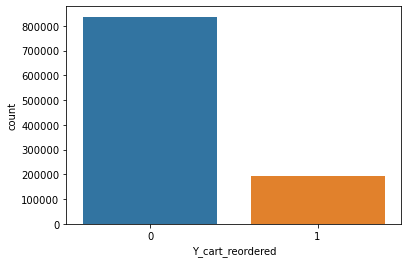

In [144]:
sns.countplot(data=X_and_Y,x='Y_cart_reordered')

<AxesSubplot:>

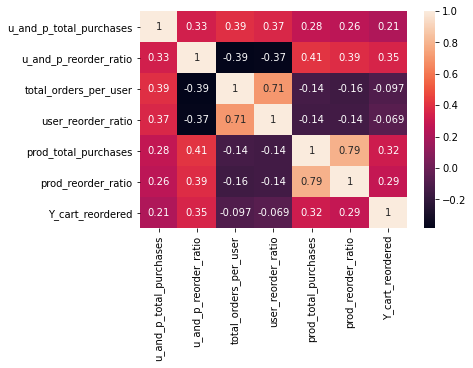

In [147]:
sns.heatmap(X_and_Y.corr(),annot=True)

# Train/test split, feature scaling

In [161]:
X = X_and_Y.drop('Y_cart_reordered',axis=1)
y = X_and_Y['Y_cart_reordered']

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [164]:
scaler = StandardScaler()

In [165]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression Model

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [224]:
log_model = LogisticRegression(solver='saga',class_weight='balanced')

In [225]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

In [226]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [227]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [228]:
grid_model.best_params_

{'C': 1291.5496650148827, 'penalty': 'l1'}

In [300]:
grid_model.best_estimator_.coef_

array([[ 0.29335484,  0.5466271 , -0.32407745,  0.09733091,  0.11224104,
         0.53881471]])

In [303]:
coefs = pd.Series(index=X.columns,data=grid_model.best_estimator_.coef_[0])

In [304]:
coefs = coefs.sort_values()

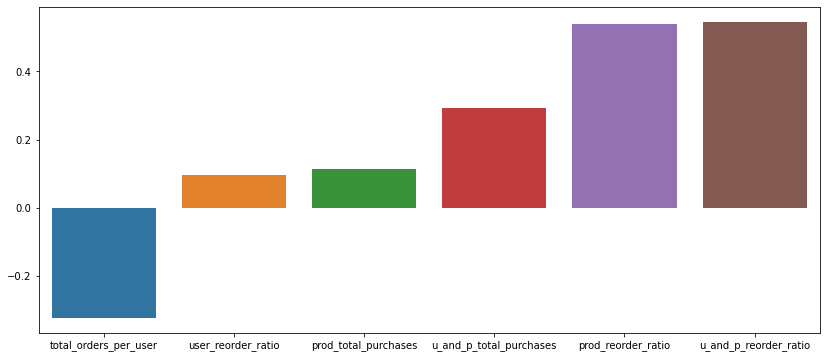

In [305]:
plt.figure(figsize=(14,6))
sns.barplot(x=coefs.index,y=coefs.values);

## Logistic Model Performance Evaluation

In [230]:
y_pred = grid_model.predict(scaled_X_test)

In [231]:
confusion_matrix(y_test,y_pred)

array([[119355,  47722],
       [ 11973,  27204]])

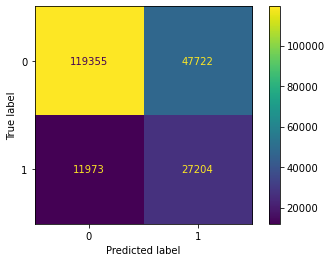

In [236]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [234]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80    167077
           1       0.36      0.69      0.48     39177

    accuracy                           0.71    206254
   macro avg       0.64      0.70      0.64    206254
weighted avg       0.81      0.71      0.74    206254



In [237]:
f1_score(y_test,y_pred)

0.47683233569669503

## Logistic Model  Performance Curves

In [249]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

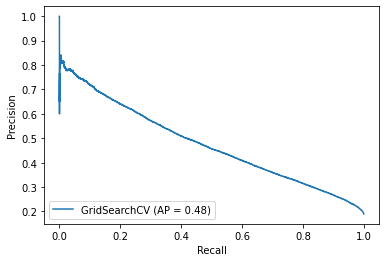

In [251]:
plot_precision_recall_curve(grid_model,scaled_X_test,y_test)

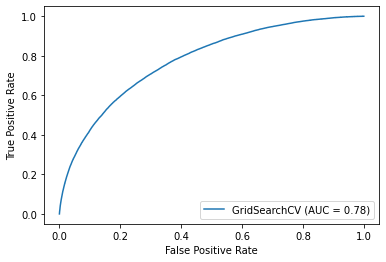

In [253]:
plot_roc_curve(grid_model,scaled_X_test,y_test)

# Random Forest

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [258]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',class_weight='balanced')

In [259]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10)

## Random Forest Performance Evaluation

In [261]:
preds = rfc.predict(X_test)

In [262]:
confusion_matrix(y_test,preds)

array([[150927,  16150],
       [ 27700,  11477]])

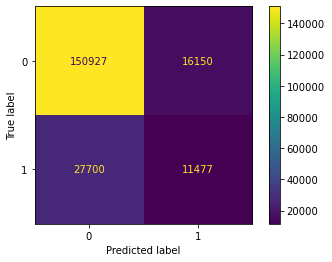

In [264]:
plot_confusion_matrix(rfc,X_test,y_test)

In [269]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87    167077
           1       0.42      0.29      0.34     39177

    accuracy                           0.79    206254
   macro avg       0.63      0.60      0.61    206254
weighted avg       0.76      0.79      0.77    206254



In [270]:
f1_score(y_test,preds)

0.343602179510209

## Random Forest Feature Importance

In [ ]:
rfc.feature_importances_

In [ ]:
feat_imp = pd.Series(index=X.columns,data=rfc.feature_importances_)

In [ ]:
feat_imp = feat_imp.sort_values()

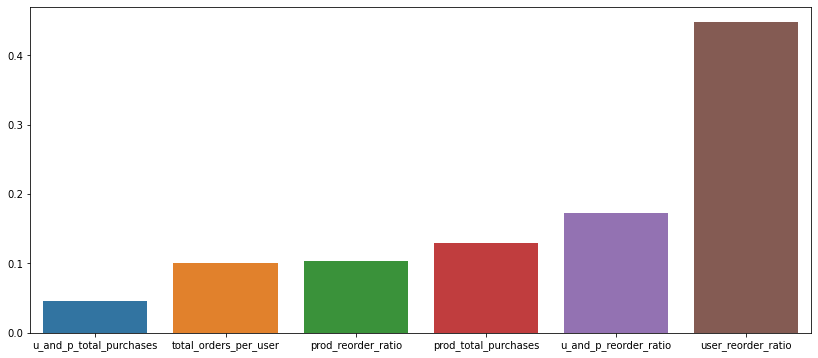

In [287]:
plt.figure(figsize=(14,6))
sns.barplot(x=feat_imp.index,y=feat_imp.values);

## Test error depending on the number of trees 

In [296]:
test_error = []

for n in range(1,15):
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

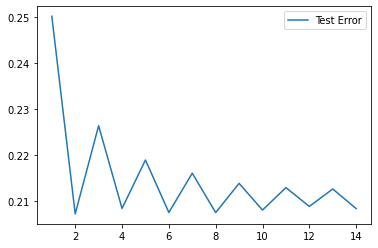

In [297]:
plt.plot(range(1,15),test_error,label='Test Error')
plt.legend()

# Generating submission

In [238]:
def get_features_w_last_order(df):
    
    #User features
    
    #Number of orders per customer
    num_orders_per_user = df.groupby(['user_id','order_completed_at'])['cart'].count()
    num_orders_per_user = num_orders_per_user.groupby('user_id').count().reset_index()
    num_orders_per_user.columns = ['user_id','total_orders_per_user']
    
    #How frequent a customer has reordered products
    df_times_ordered = df.groupby(['user_id','cart']).count().reset_index()
    df_times_ordered['was_reordered'] = df_times_ordered['order_completed_at'].apply(lambda x: 0 if x == 1 else 1)
    df_times_ordered.columns = ['user_id','cart','times_ordered','was_reordered']
    df_times_ordered['times_reordered'] = df_times_ordered['times_ordered'] - 1
    nominator_1 = df_times_ordered.groupby('user_id')['times_reordered'].sum() 
    denominator_1 = df_times_ordered.groupby('user_id')['times_ordered'].sum()
    user_reorder = nominator_1 / denominator_1
    user_reorder = user_reorder.reset_index()
    user_reorder.columns = ['user_id','user_reordered_ratio']
    user_features = pd.merge(num_orders_per_user,user_reorder,how='inner',on='user_id')
    
    #Product features
    
    #Number of purchases for each product
    product = df['cart'].value_counts().to_frame('p_total_purchases')
    product = product.reset_index()
    product.columns = ['cart', 'prod_total_purchases']
    
    #What is the probability for a product to be reordered
    denominator_2 = df_times_ordered.groupby('cart')['times_ordered'].sum()
    nominator_2 = df_times_ordered.groupby('cart')['times_reordered'].sum()
    product_reorder = nominator_2 / denominator_2
    product_reorder = product_reorder.reset_index()
    product_reorder.columns = ['cart','product_reorder_ratio']
    product_features = pd.merge(product,product_reorder,how='left',on='cart')
    
    #User-product features
    
    #How many times a user bought a product
    df_user_product = df_times_ordered.drop(['was_reordered','times_reordered'],axis=1)
    df_user_product.columns = ['user_id','cart','u_and_p_total_purchases']
    
    #How frequently a customer bought a product after its first purchase
    total_orders = df_user_orders['user_id'].value_counts().to_frame().reset_index()
    total_orders.columns = ['user_id', 'total_num_orders']
    
    first_order_date = df.groupby(['user_id','cart']).agg({'order_completed_at': np.min})
    first_order_date = first_order_date.reset_index()

    user_order_dates = df.groupby(['user_id', 'order_completed_at']).count().drop('cart', axis=1).reset_index()

    idxs = []
    for r in user_order_dates.groupby('user_id').count()['order_completed_at'].apply(lambda x: range(1, x+1)):
        idxs += list(r)

    idxs = np.array(idxs)
    user_order_dates['order_num'] = idxs

    m = pd.merge(first_order_date, user_order_dates, how='inner', on=['user_id', 'order_completed_at'])
    m = pd.merge(m, total_orders, how='inner', on='user_id')
    m = m.drop('order_completed_at',axis=1)

    m.columns = ['user_id','cart','first_order_num', 'total_num_orders']
    m['num_orders_potential'] = m.total_num_orders - m.first_order_num + 1

    m = pd.merge(m, df_user_product, how="left", on=["user_id", "cart"])
    m['u_and_p_reorder_ratio'] = m.u_and_p_total_purchases / m.num_orders_potential

    u_and_p_ratio = m.drop(['first_order_num', 'total_num_orders', 'num_orders_potential', 'u_and_p_total_purchases'], 
                           axis=1)
    u_and_p = pd.merge(df_user_product, u_and_p_ratio, how="inner", on=["user_id","cart"]) 
        
    #Merge all features to get final dataframe
    X = pd.merge(u_and_p, user_features, how="left", on="user_id")
    X = pd.merge(X, product_features, how="left", on="cart")
    
    return X

In [239]:
X_orig = get_features_w_last_order(df)
X_orig

,user_id,cart,u_and_p_total_purchases,u_and_p_reorder_ratio,total_orders_per_user,user_reordered_ratio,prod_total_purchases,product_reorder_ratio
0,0,5,1,0.500000,3,0.181818,30753,0.616915
1,0,10,1,0.500000,3,0.181818,14579,0.637081
2,0,14,2,0.666667,3,0.181818,93957,0.829316
3,0,20,1,0.333333,3,0.181818,15333,0.567599
4,0,22,1,0.500000,3,0.181818,68478,0.787552
...,...,...,...,...,...,...,...,...
1117595,19998,409,1,1.000000,3,0.315789,59920,0.787316
1117596,19998,415,2,0.666667,3,0.315789,2230,0.441704
1117597,19998,420,2,0.666667,3,0.315789,48047,0.719691
1117598,19998,798,1,1.000000,3,0.315789,22627,0.555796


In [240]:
X_submit = X_orig.drop(['user_id', 'cart'], axis=1)
X_submit

,u_and_p_total_purchases,u_and_p_reorder_ratio,total_orders_per_user,user_reordered_ratio,prod_total_purchases,product_reorder_ratio
0,1,0.500000,3,0.181818,30753,0.616915
1,1,0.500000,3,0.181818,14579,0.637081
2,2,0.666667,3,0.181818,93957,0.829316
3,1,0.333333,3,0.181818,15333,0.567599
4,1,0.500000,3,0.181818,68478,0.787552
...,...,...,...,...,...,...
1117595,1,1.000000,3,0.315789,59920,0.787316
1117596,2,0.666667,3,0.315789,2230,0.441704
1117597,2,0.666667,3,0.315789,48047,0.719691
1117598,1,1.000000,3,0.315789,22627,0.555796


In [241]:
X_submit_scaled = scaler.fit_transform(X_submit)

y_pred_submit = grid_model.predict(X_submit_scaled)

y_pred_submit

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [242]:
submit_df

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,1
790447,19998;798,1


In [243]:
my_submit = X_orig['user_id'].astype('str') + ';' + X_orig['cart'].astype('str')
my_submit = my_submit.to_frame()
my_submit['target'] = y_pred_submit
my_submit.columns = ['id','target']
my_submit

,id,target
0,0;5,0
1,0;10,0
2,0;14,1
3,0;20,0
4,0;22,1
...,...,...
1117595,19998;409,1
1117596,19998;415,0
1117597,19998;420,1
1117598,19998;798,1


In [244]:
submission_trunc = pd.merge(submit_df, my_submit, how='left', on='id').drop('target_x', axis=1)
submission_trunc.columns = ['id', 'target']
submission_trunc['target'] = submission_trunc['target'].astype('int')
submission_trunc.to_csv('submission.csv', index=False)
submission_trunc

,id,target
0,0;133,0
1,0;5,0
2,0;10,0
3,0;396,1
4,0;14,1
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,0
790447,19998;798,1
